# Olympics Tokyo 2021
___

In [1]:
# imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

import os
import warnings
# warnings.filterwarnings("ignore")

In [2]:
# load the data
files = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        files.append(os.path.join(dirname, filename))\
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df_genders = pd.read_excel(files[0])
df_teams = pd.read_excel(files[1])
df_athletes = pd.read_excel(files[2])
df_coaches = pd.read_excel(files[3])
df_medals = pd.read_excel(files[4])    

/kaggle/input/2021-olympics-in-tokyo/EntriesGender.xlsx
/kaggle/input/2021-olympics-in-tokyo/Teams.xlsx
/kaggle/input/2021-olympics-in-tokyo/Athletes.xlsx
/kaggle/input/2021-olympics-in-tokyo/Coaches.xlsx
/kaggle/input/2021-olympics-in-tokyo/Medals.xlsx


/opt/conda/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/conda/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
# /TODO dataset details

___
## EDA

### Genders EDA

In [4]:
# display first rows
display(df_genders.head(10))

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041
5,Badminton,86,87,173
6,Baseball/Softball,90,144,234
7,Basketball,144,144,288
8,Beach Volleyball,48,48,96
9,Boxing,102,187,289


In [5]:
df_genders.info()
df_genders.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Discipline  46 non-null     object
 1   Female      46 non-null     int64 
 2   Male        46 non-null     int64 
 3   Total       46 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.6+ KB


,count,mean,std,min,25%,50%,75%,max
Female,46.0,118.086957,147.169717,10.0,42.75,90.0,138.75,969.0
Male,46.0,127.913043,166.900746,0.0,40.25,97.5,149.75,1072.0
Total,46.0,246.000000,312.461340,19.0,85.50,190.0,288.75,2041.0


>On average the genders representation seems equally distributed, with a bit more man overall across all the disciplines.

>There is at least one discipline without any man.

In [6]:
df_gender_delta = df_genders[['Discipline', 'Total', 'Male', 'Female']].sort_values(by='Total', ascending=False)
df_gender_delta['gender_delta'] = df_genders['Male'] - df_genders['Female']
df_gender_delta['gender_delta_percent'] = df_gender_delta['gender_delta'] / df_genders['Total'] * 100

df_gender_delta

cmap_delta = colors.LinearSegmentedColormap.from_list('my_cmap', ['darkred','white','darkgreen'])
cmap_delta_percent = colors.LinearSegmentedColormap.from_list('my_cmap', [(0,'darkred'),(0.75,'white'),(1,'darkgreen')])

df_gender_delta.style.background_gradient(cmap='Blues', axis=0, subset=['Total']).background_gradient(cmap='Greens', axis=0, subset=['Male']).background_gradient(cmap='Reds', axis=0, subset=['Female']).background_gradient(cmap=cmap_delta, axis=0, subset=['gender_delta']).background_gradient(cmap=cmap_delta_percent, axis=0, subset=['gender_delta_percent'])

,Discipline,Total,Male,Female,gender_delta,gender_delta_percent
4,Athletics,2041,1072,969,103,5.046546
36,Swimming,779,418,361,57,7.317073
20,Football,608,344,264,80,13.157895
29,Rowing,522,265,257,8,1.532567
24,Judo,393,201,192,9,2.290076
23,Hockey,384,192,192,0,0.000000
32,Shooting,356,178,178,0,0.000000
31,Sailing,350,175,175,0,0.000000
22,Handball,336,168,168,0,0.000000
30,Rugby Sevens,297,151,146,5,1.683502


>With the tabular data above, we observe:
>- There are significantly more men (>~15%) in Wrestling, Boxing, Baseball, Cycling road and Equestrian disciplines.
>- There is a little more man (>~5%) in Athletics, Swimming, Football sports.
>- women have a complete domination in Artistic Swimming and Rhythmic Gymnastics, as there are no male athletes in these disciplines.
>- Athletics is the discipline with the most athletes, and Cycling BMX Freestyle with the least number of athletes.

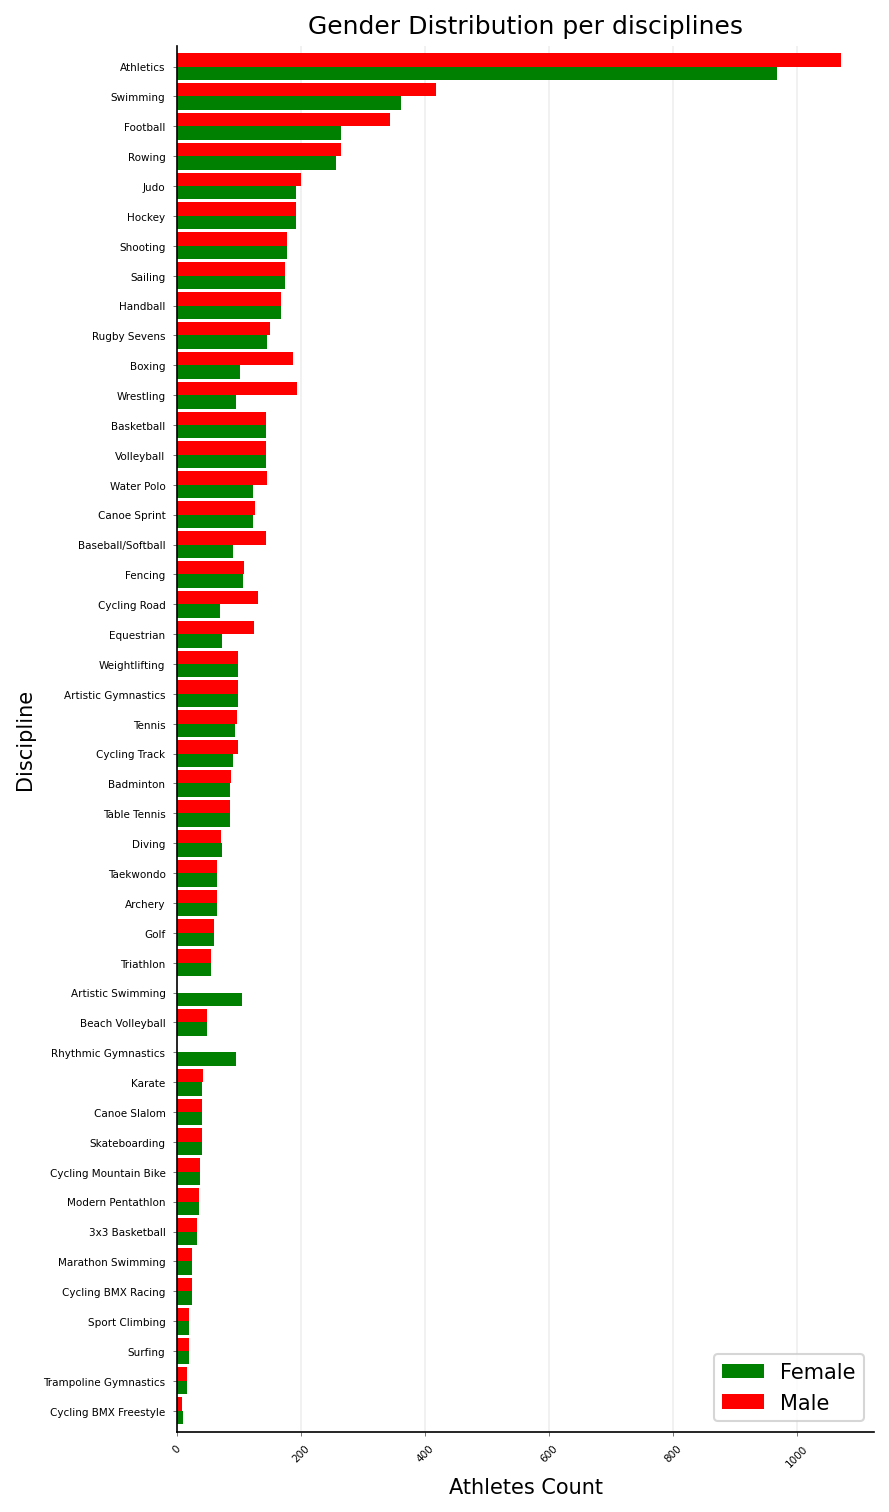

In [7]:
# gender grouped barplot by disciplines

# sort data
df_genders.sort_values(by='Total',inplace=True)

plt.rcParams['figure.dpi'] = 150

# setup colors and grid
# ax.grid(which='major', axis='x', zorder=0, color='lightgray', linewidth=0.5)

fig = plt.figure(figsize=(6,12))

ax0 = fig.add_subplot()

# hbar plot
ax = df_genders.plot(x='Discipline',y=['Female','Male'],kind='barh',ax=ax0,zorder=2,width=0.9, color=['green', 'red'])

# removes useless axes
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.tick_params(labelsize=5, width=0.25, length=2)

# grid lines
ax.grid(which='major', alpha=0.2)
plt.grid(axis='y')

# sotate discipline labels for better readability
plt.xticks(rotation=45)

# set axis labels and title
ax.set_xlabel('Athletes Count')
ax.set_ylabel('Discipline')
# set title and legend
plt.title('Gender Distribution per disciplines')
plt.legend(loc='best')

plt.show()

<Figure size 1280x960 with 0 Axes>

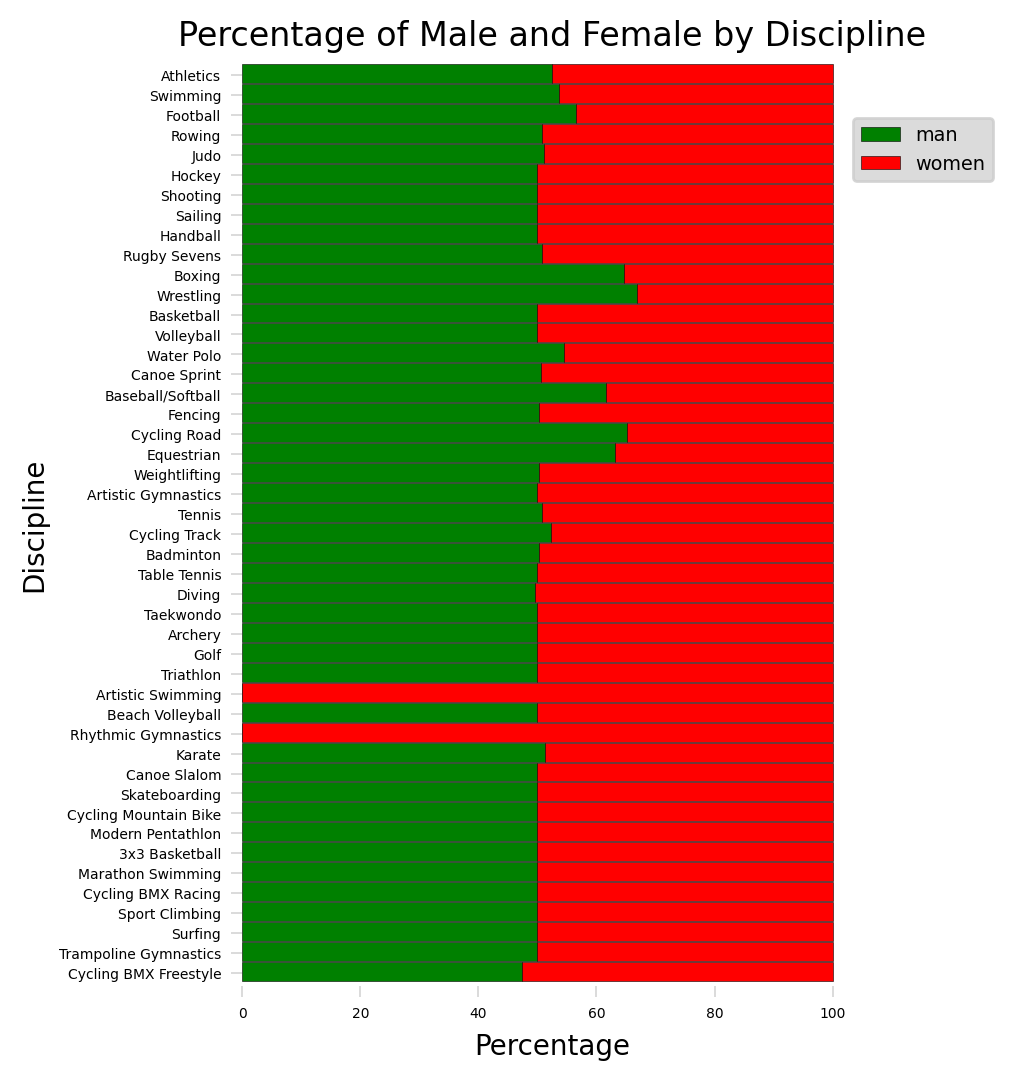

In [8]:
plt.rcParams['figure.dpi'] = 200


# horizontal percent stack chart
# Assuming your DataFrame is named 'df'
df_genders_prop = df_genders
df_genders_prop['prop_man'] = df_genders_prop['Male'] / df_genders_prop['Total'] * 100
df_genders_prop['prop_woman'] = df_genders_prop['Female'] / df_genders_prop['Total'] * 100
df_genders_prop = df_genders_prop[['Discipline', 'prop_man', 'prop_woman']]

# Set the figure size
plt.figure()
fig, ax0 = plt.subplots()

# Create the bar chart
ax = df_genders_prop.plot(x='Discipline', kind='barh', stacked=True,ax=ax0 ,width=0.8, color=['green', 'red'], figsize=(4,6))
# bar height and borders
for container in ax.containers:  
    plt.setp(container, height=0.95)
    bars = container.get_children()
    for bar in bars:
        bar.set_edgecolor('black')
        bar.set_linewidth(0.2) 

# removes useless axes
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(labelsize=5, width=0.1, length=4)

# add legend
plt.legend(labels=['man', 'women'], fontsize='x-small', bbox_to_anchor=(0.97, 0.95), facecolor='lightgrey')

# Add labels and title
plt.xlabel('Percentage')
plt.ylabel('Discipline')
plt.title('Percentage of Male and Female by Discipline')

# Show the plot
plt.show()